In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

precision_list = [1,2, 5,10, 20, 30, 40]

columns = ['method', 'case', 'M', 'precision', 'h', 'N', 'dirichlet_jump', 'neumann_jump', 'rel_error']

result = None
case = 'B'
method = 'MTF'
for M in [2, 3]:
    for precision in precision_list:
        if precision in [30, 40] and case == 'B':
            solver = 'gmres'
        else:
            solver = 'direct'
        name = 'results/' + str(M) + case + str(precision) + 'mtf' + solver + '.npy'
        results = np.load(name)
        results = np.array([np.append([method, case], results)])
        if result is None:
            result = results
        else:
            result = np.concatenate([result, results], axis=0)

method = 'STF'
for M in [2]:
    for precision in precision_list:
        name = 'results/' + str(M) + case + str(precision) + 'stf' + solver + '.npy'
        results = np.load(name)
        results = np.array([np.append([method, case], results)])
        if result is None:
            result = results
        else:
            result = np.concatenate([result, results], axis=0)


result = pd.DataFrame(result, columns = columns)

result[['method', 'case', 'M']] = result[['method', 'case', 'M']].astype(str)
result[['precision', 'N']] = result[['precision', 'N']].astype(float).astype(int)
result[['h', 'dirichlet_jump', 'neumann_jump', 'rel_error']] = result[['h', 'dirichlet_jump', 'neumann_jump', 'rel_error']].astype(float)

In [14]:
result_stf = result[result['method'] == 'STF']
result_mtf = result[result['method'] == 'MTF']

result2_stf = result_stf[result_stf['M'] == '2.0']

result2_mtf = result_mtf[result_mtf['M'] == '2.0']
result3_mtf = result_mtf[result_mtf['M'] == '3.0']

logh2_stf = np.log10(result2_stf['h'].values)
logh2_mtf = np.log10(result2_mtf['h'].values)
logh3_mtf = np.log10(result3_mtf['h'].values)

logerr2_stf = np.log10(result2_stf['rel_error'].values)
logerr2_mtf = np.log10(result2_mtf['rel_error'].values)
logerr3_mtf = np.log10(result3_mtf['rel_error'].values)

logerrD3 = np.log10(result3_mtf['dirichlet_jump'].values)
logerrN3 = np.log10(result3_mtf['neumann_jump'].values)

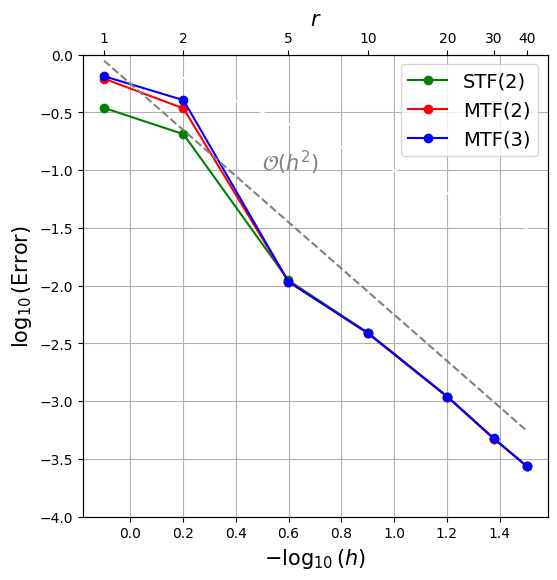

In [15]:
from matplotlib import pyplot as plt 

fig, ax  = plt.subplots(1,1, figsize=(6,6))

ax.plot(-logh2_stf, logerr2_stf, marker='o', label = 'STF(2)', color = 'green')
ax.plot(-logh2_mtf, logerr3_mtf, marker='o', label = 'MTF(2)', color = 'red')
ax.plot(-logh3_mtf, logerr2_mtf, marker='o', label = 'MTF(3)', color = 'blue')


#ax.plot(-logh, Logerr, marker='o', label = 'Second moment', color = 'k')
ax.plot(-logh2_mtf,  -.25 + 2 * logh2_mtf, color = 'gray', linestyle= '--')

plt.text(.5, -1, r'$\mathcal{O}(h^2)$', fontsize=15, color='gray')
ax2 = ax.twiny()
ax2.plot(-logh2_stf, logh2_stf, color='w')
ax2.set_xticks(-logh2_stf)
ax2.set_xticklabels(precision_list)
ax.legend(prop={'size': 14})#prop={'size': 14})
ax.grid()
plt.ylim(-4,0)
ax.set_xlabel(r'$-\log_{10}(h)$', fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=15)
ax.set_ylabel(r'$\log_{10}($Error$)$', fontsize=15)

plt.savefig('results/hRCS' + case + '.pdf')

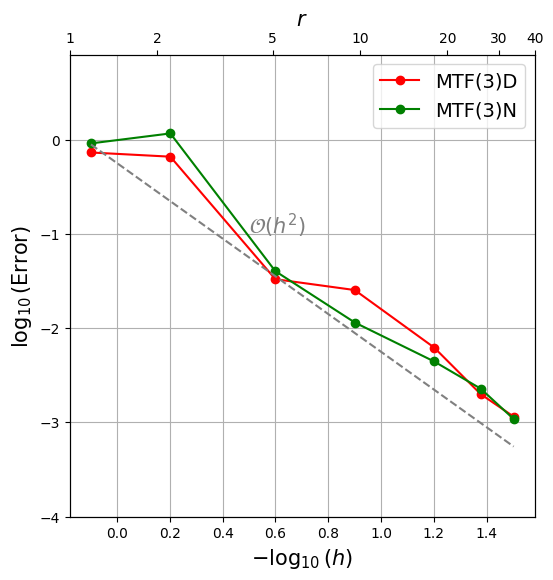

In [16]:
from matplotlib import pyplot as plt 

fig, ax  = plt.subplots(1,1, figsize=(6,6))

ax.plot(-logh3_mtf, logerrD3, marker='o', label = 'MTF(3)D', color = 'red')
ax.plot(-logh3_mtf, logerrN3, marker='o', label = 'MTF(3)N', color = 'green')
#ax.plot(-logh, Logerr, marker='o', label = 'Second moment', color = 'k')
ax.plot(-logh3_mtf,  -.25 + 2 * logh3_mtf, color = 'gray', linestyle= '--')

plt.text(.5, -1, r'$\mathcal{O}(h^2)$', fontsize=15, color='gray')
ax2 = ax.twiny()
#ax2.plot(-logh3_mtf, logh3_mtf, color='w')
ax2.set_xticks(-logh3_mtf)
ax2.set_xticklabels(precision_list)
ax.legend(prop={'size': 14})#prop={'size': 14})
ax.grid()
plt.ylim(-4,.9)
ax.set_xlabel(r'$-\log_{10}(h)$', fontsize=15)
ax2.set_xlabel(r'$r$', fontsize=15)
ax.set_ylabel(r'$\log_{10}($Error$)$', fontsize=15)

plt.savefig('results/hTraces' + case + '.pdf')